https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-frequencies-in-python/

In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [65]:
consumer_key= 'FCiELOid3JEEWi08wPK1mUY24'
consumer_secret= 'qJQUXPDRghGlPwUBJqG1wVXdnYLEsLIpqgT5Fn57f8nWGntMIT'
access_token= '2470096603-cyZwN87zn3TWVZgpAtSMmhXEieRcTk78Uu5fnQA'
access_token_secret= '2u8ygy5Wn5Qa4YPzVDJFdXgaVfzqOF6bJvBvLRwMOyITj'

In [66]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
print(api)

In [67]:
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]


['The Economist Climate Change Issue Discussion Questions -- This post has a free instant download PDF for the 9-21-2… https://t.co/d7vE9YJLDR',
 "Educating Girls May Be Nigeria's Best Defense Against Climate Change https://t.co/7hX12dLLcx #StateOfClimate… https://t.co/xFekPgQZg2",
 'The Netherlands looks set to miss its own #climate target for reducing #greenhousegas emissions by 2030, according… https://t.co/um1bc72OcB',
 'I’m a Climate Scientist Who Believes in God. Hear Me Out. https://t.co/jlbI3sHo38 #climate',
 'Study shows #climate value of protecting undisturbed, intact forests: https://t.co/4Be6oPWyo8 #actonclimate']

In [68]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [69]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]


['The Economist Climate Change Issue Discussion Questions This post has a free instant download PDF for the 9212',
 'Educating Girls May Be Nigerias Best Defense Against Climate Change StateOfClimate',
 'The Netherlands looks set to miss its own climate target for reducing greenhousegas emissions by 2030 according',
 'Im a Climate Scientist Who Believes in God Hear Me Out climate',
 'Study shows climate value of protecting undisturbed intact forests actonclimate']

In [70]:
# Note how capitalization impacts unique returned values
ex_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Get unique elements in the list
set(ex_list)


{',', 'Dog', 'cat', 'dog'}

In [71]:
# Note how capitalization impacts unique returned values
words_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case


['dog', 'dog', 'dog', 'cat', 'cat', ',']

In [72]:
# Now you have only unique words
set(lower_case)


{',', 'cat', 'dog'}

In [73]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].split()


['The',
 'Economist',
 'Climate',
 'Change',
 'Issue',
 'Discussion',
 'Questions',
 'This',
 'post',
 'has',
 'a',
 'free',
 'instant',
 'download',
 'PDF',
 'for',
 'the',
 '9212']

In [74]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()


['the',
 'economist',
 'climate',
 'change',
 'issue',
 'discussion',
 'questions',
 'this',
 'post',
 'has',
 'a',
 'free',
 'instant',
 'download',
 'pdf',
 'for',
 'the',
 '9212']

In [75]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]


[['the',
  'economist',
  'climate',
  'change',
  'issue',
  'discussion',
  'questions',
  'this',
  'post',
  'has',
  'a',
  'free',
  'instant',
  'download',
  'pdf',
  'for',
  'the',
  '9212'],
 ['educating',
  'girls',
  'may',
  'be',
  'nigerias',
  'best',
  'defense',
  'against',
  'climate',
  'change',
  'stateofclimate']]

In [76]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)


[('climate', 867),
 ('change', 652),
 ('the', 541),
 ('to', 409),
 ('of', 281),
 ('and', 260),
 ('is', 229),
 ('in', 219),
 ('climatechange', 184),
 ('a', 183),
 ('on', 171),
 ('for', 132),
 ('we', 112),
 ('how', 87),
 ('are', 77)]

In [77]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()


,words,count
0,climate,867
1,change,652
2,the,541
3,to,409
4,of,281


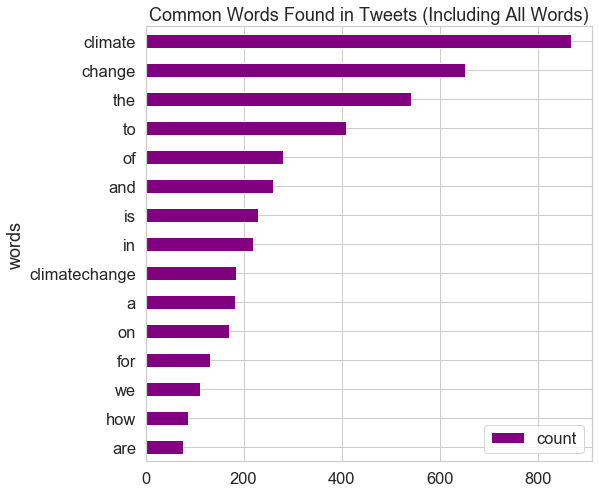

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [79]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]


['there', 'he', 'above', 'nor', 'so', 'too', 'hasn', 'you', 'off', 'now']

In [81]:
words_in_tweet[0]


['the',
 'economist',
 'climate',
 'change',
 'issue',
 'discussion',
 'questions',
 'this',
 'post',
 'has',
 'a',
 'free',
 'instant',
 'download',
 'pdf',
 'for',
 'the',
 '9212']

In [84]:
for all_words in words_in_tweet:
    for a word in all_words:
        # remove stop words

SyntaxError: invalid syntax (<ipython-input-84-842d9659e6cb>, line 2)

In [85]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]


['economist',
 'climate',
 'change',
 'issue',
 'discussion',
 'questions',
 'post',
 'free',
 'instant',
 'download',
 'pdf',
 '9212']

In [86]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)


[('climate', 867),
 ('change', 652),
 ('climatechange', 184),
 ('amp', 58),
 ('new', 58),
 ('globalwarming', 56),
 ('could', 43),
 ('people', 38),
 ('us', 36),
 ('sea', 33),
 ('may', 32),
 ('need', 32),
 ('un', 31),
 ('environment', 30),
 ('california', 30)]

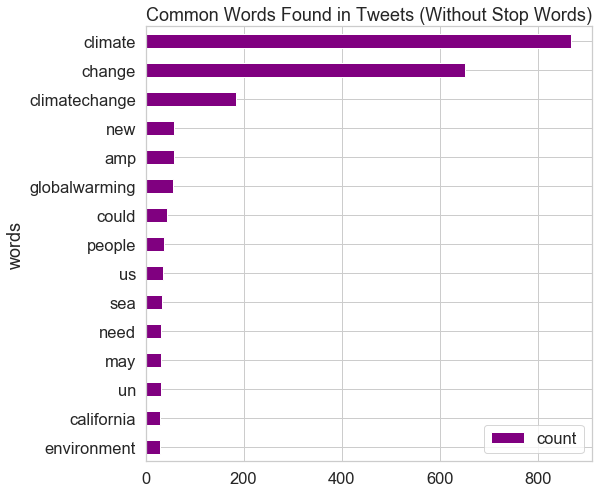

In [87]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()


In [88]:
collection_words = ['climatechange', 'climate', 'change']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]


In [89]:
tweets_nsw[0]


['economist',
 'climate',
 'change',
 'issue',
 'discussion',
 'questions',
 'post',
 'free',
 'instant',
 'download',
 'pdf',
 '9212']

In [90]:
tweets_nsw_nc[0]


['economist',
 'issue',
 'discussion',
 'questions',
 'post',
 'free',
 'instant',
 'download',
 'pdf',
 '9212']

In [91]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)


[('amp', 58),
 ('new', 58),
 ('globalwarming', 56),
 ('could', 43),
 ('people', 38),
 ('us', 36),
 ('sea', 33),
 ('may', 32),
 ('need', 32),
 ('un', 31),
 ('environment', 30),
 ('california', 30),
 ('cop25', 29),
 ('world', 28),
 ('government', 28)]

In [92]:
len(counts_nsw_nc)


3548

In [93]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()


,words,count
0,amp,58
1,new,58
2,globalwarming,56
3,could,43
4,people,38


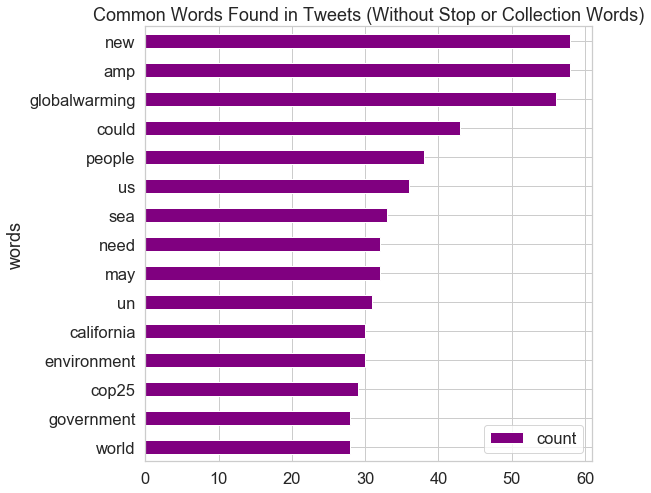

In [94]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()
